In this notebook I reconstruct images using one autoencoder trained to reconstruct bare soil. Images have been obtained from GEE --> Landsat 7: monthly composite during one year and bands:  'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'.

In [2]:
base_path = '/home/clara'  # '/cats/datastore3/claraenv/code/my-projects/'  # '/home/clara/Documents/'

# Libraries

In [1]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip
from random import randint
import math
import re
import random

'''Data Viz'''
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import matplotlib.cm as cm
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import joblib 

'''TensorFlow and Keras'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model, load_model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

from osgeo import gdal
from osgeo import gdal_array
import matplotlib.pyplot as plt
import numpy as np
import sys
from osgeo.gdalconst import *
import os

import math
import codecs

import osgeo #this is necessary for the type comparison in some methods
from osgeo import osr
from osgeo import ogr
from collections import defaultdict
import itertools
from osgeo import gdal_array as gdar
from osgeo import gdalconst as gdct
import glob

# Functions

In [9]:
def is_leap_year(year):
    """ if year is a leap year return True
        else return False """
    if year % 100 == 0:
        return year % 400 == 0
    return year % 4 == 0

def doy(Y,M,D):
    """ given year, month, day return day of year
        Astronomical Algorithms, Jean Meeus, 2d ed, 1998, chap 7 """
    if is_leap_year(Y):
        K = 1
    else:
        K = 2
    N = int((275 * M) / 9.0) - K * int((M + 9) / 12.0) + D - 30
    return N
def scale_MinMax (array, model_filepath, scaler_name):
    
    # Create scaler and scale
    scaler = pp.MinMaxScaler()
    array_scaled = scaler.fit_transform(array)
    
    #Create new folder and save
    mf_scaler = os.path.join(model_filepath, scaler_name)
    if not os.path.exists(mf_scaler):
        os.mkdir(mf_scaler) 
    
    joblib.dump(scaler, mf_scaler + '/scale.mod')
    
    return array_scaled

# Paths

In [3]:
# Figures filepaths
mf = f'{base_path}/autoencoders/bare_soil-detection/models/'
mf3 = f'{base_path}/autoencoders/bare_soil-detection/prediction/'

# Prepare data

In [ ]:
# import image
image = 'path'

# reshape data
vector = np.array(image)

# add features
vector = 

# Prediction

In [6]:
start_p = time.time()

# Models
model = keras.models.load_model(mf)
scaler = joblib.load(f'{base_path}/autoencoders/bare_soil-detection/models/scale.mod')

# Scale
vector_scaled = scaler.transform(vector)

# Predict
prediction_scaled = model.predict(x=vector_scaled, verbose=1)

# Descale
prediction = scaler.inverse_transform(prediction_scaled)

# Convert to original shape
prediction = prediction.transpose()
prediction = prediction. reshape(image.shape[0], image.shape[1], image.shape[2])

end_p = time.time()
print(f'Prediction time ---minutes--- {(end_p-start_p)/60}')

**Calculate error: RMSE (with scaled values)**

In [40]:
# RMSE y=bands of one image -> predicted vs original + mean of the RMSE between all images
dif = (prediction[:,:,:]-image[:,:,:])**2
suma = np.sum(dif, axis = 0)
div = suma/(testing.shape[0]-2)
error = div**(1/2)

Calculating error autoencoder 0...
Calculating error autoencoder 1...
Calculating error autoencoder 2...
Calculating error autoencoder 3...
Calculating error autoencoder 4...
Calculating error autoencoder 5...
Calculating error autoencoder 6...
Calculating error autoencoder 7...


**Plot error**

In [41]:
##hyperparameters (visualization)
vmin= 0
vmax= 100

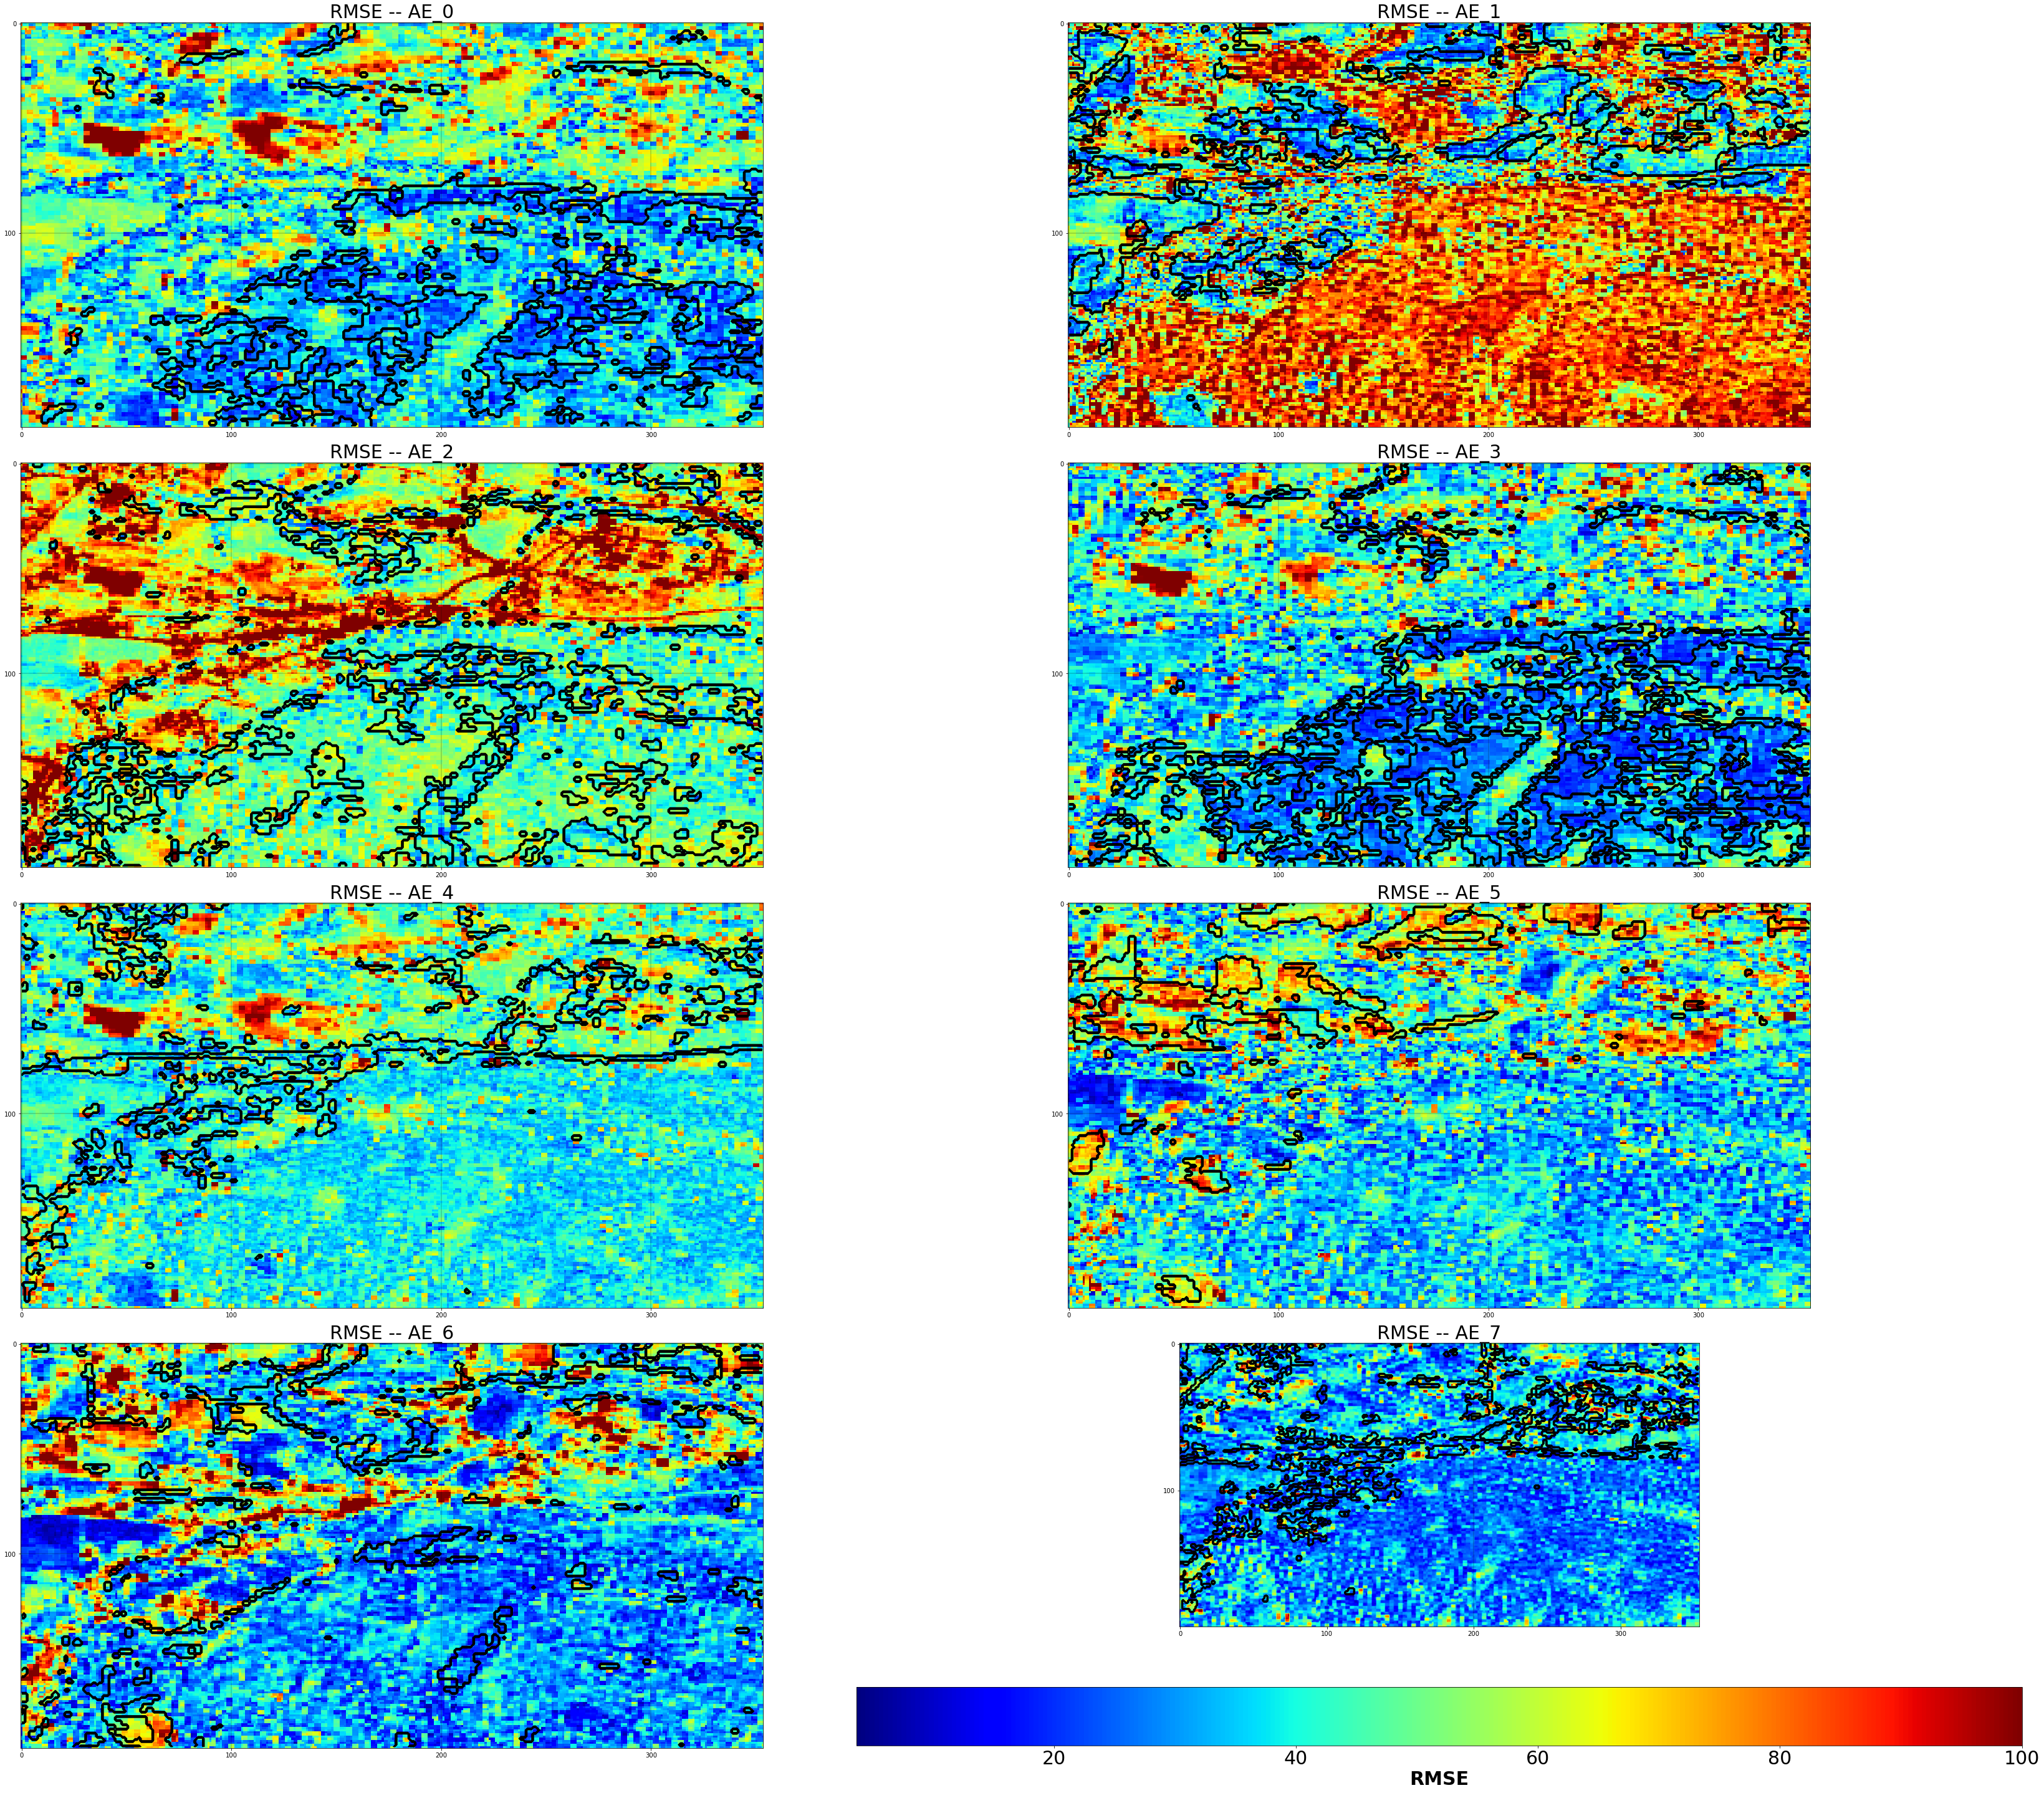

In [42]:
# Prepare subplots
n_figures = n_clusters
n_rows = int(math.ceil((n_figures)**(1/2))) +1
n_cols = int(math.ceil(n_figures/n_rows))
fig, axs = plt.subplots(n_rows, n_cols, figsize= (50,40))
rows=[]
columns = []
for row in range(n_rows):
    for col in range(n_cols):
        rows.append(row)
        columns.append(col)

# RMSE in each subplot: plot error matrices
cm = 'jet'
for ae in range(n_figures):
    mean = error_list[ae]
    cluster = labels==ae
    ax = axs[rows[ae], columns[ae]]
    im = ax.imshow(mean, cmap=cm, vmax=100)
    ax.contour(cluster, colors='black', linewidths=1.5)
    ax.set_xticks(np.arange(mean.shape[1]+1, step=100))
    ax.set_yticks(np.arange(mean.shape[0]+1, step=100))
    ax.grid(color='black', linewidth=0.3)
    ax.set_title(f'RMSE -- AE_{ae}', fontsize=30)

# delete empty figures
for image in range(n_figures, n_rows*n_cols):
    axs[rows[image], columns[image]].set_axis_off()

# colorbar
cb = plt.colorbar(im, orientation="horizontal", pad=0.15)
cb.set_label(label='RMSE', size=30, weight='bold')
cb.ax.tick_params(labelsize=30)

# save
plt.tight_layout()
#plt.savefig(f'{mf3}/RMSE_all_AE.png', format='png', dpi=300)
plt.show()

# Reconstruction

**TRUE COLOR COMPOSITE**

In [49]:
best_pred = []
for c in range(n_clusters):
    cluster = error == c
    prediction_cluster = prediction[c]
    pred_cluster = cluster * prediction_cluster
    best_pred.append(pred_cluster)
best_pred = np.array(best_pred)
best_pred = np.sum(best_pred, axis = 0)
best_pred.shape

(14, 193, 354)

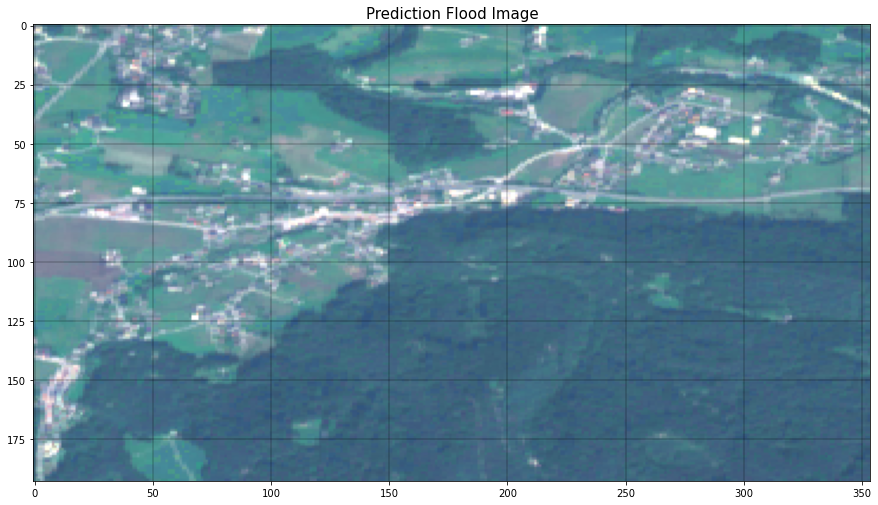

In [50]:
plt.figure(figsize = (15,15))
image = best_pred
img = np.dstack((image[3, ...]/1500, image[2, ...]/1500, image[1, ...]/1500))
img = np.clip(img, 0, 1)
plt.imshow(np.array(img))
plt.grid(color='black', linewidth=0.3)
plt.title(f'Prediction Flood Image', fontsize=15)
plt.savefig(f'{figures_filepath}/reconstruction_TCC.png', format='png', dpi=300)
plt.show()

# End :)